In [170]:
import warnings
import shutil
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout , BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import normalize

In [171]:
os.chdir("H:\\Microsoft assignment")
print(os.getcwd())

H:\Microsoft assignment


# Checking class imbalance

In [172]:
df = pd.read_csv("trainLabels.csv")

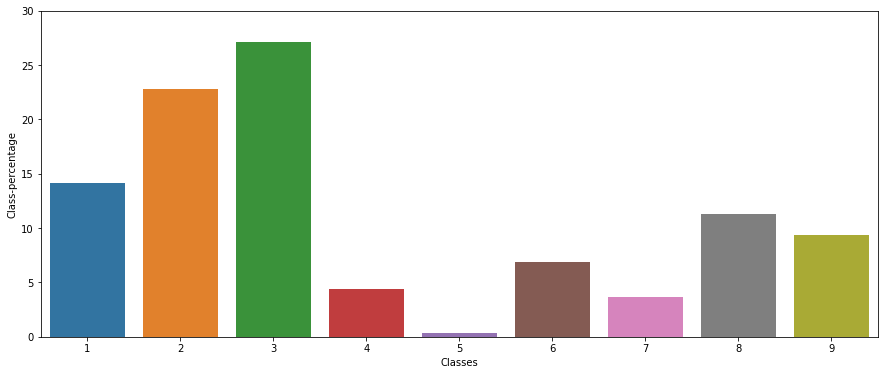

In [173]:
plt.figure(figsize=(15,6))
df_percentage = pd.DataFrame(df["Class"].value_counts()*100/df.shape[0])
df_percentage.reset_index(drop=False, inplace=True)
ax= sns.barplot(x="index", y= "Class", data=df_percentage)
ax.yaxis.set_ticks(np.linspace(0, 100, 21))
plt.ylim(0,30)
plt.ylabel("Class-percentage")
plt.xlabel("Classes")
plt.show()

# Feature extraction

## Sizes of files 

In [174]:
df.sort_values(by="Id", inplace=True)
df.head(2)

,Id,Class
1541,01IsoiSMh5gxyDYTl4CB,2
8627,01SuzwMJEIXsK7A8dQbl,8


In [175]:
files=os.listdir('byteFiles')
files.sort()

In [176]:
files[0:2]

['01IsoiSMh5gxyDYTl4CB.bytes', '01SuzwMJEIXsK7A8dQbl.bytes']

In [177]:
os.chdir("H:\\Microsoft assignment\\byteFiles")
print(os.getcwd())

H:\Microsoft assignment\byteFiles


In [178]:
sizes_in_mb = []
for file in files:
    if os.path.isfile(file):
        sizes_in_mb.append(((os.path.getsize(file))/1024)/1024)
df["sizes_in_mb"] = sizes_in_mb

In [179]:
df["sizes_in_mb"] = df["sizes_in_mb"]*df["sizes_in_mb"]

In [180]:
df["sizes_in_mb"]

1541    42.983134
8627     0.192690
9855    25.127114
9856    21.178871
0        0.461975
          ...    
7413     0.218355
7425     0.353700
7426     4.942372
7428     0.697975
7431     4.942372
Name: sizes_in_mb, Length: 10868, dtype: float64

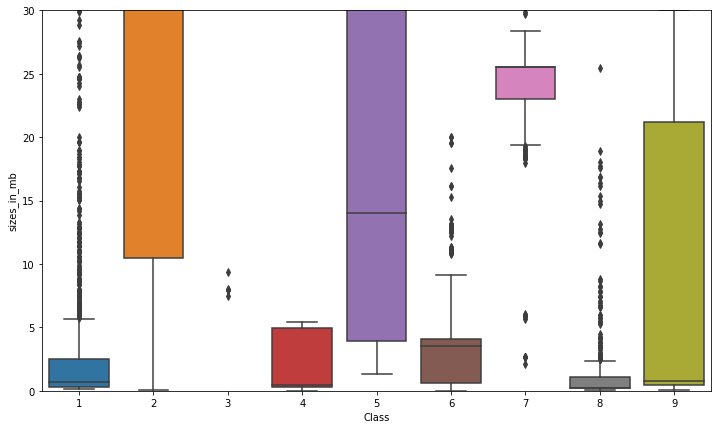

In [181]:
plt.figure(figsize=(12,7))
plt.ylim(0,30)
sns.boxplot(x="Class",y="sizes_in_mb", data=df)

In [182]:
os.chdir("H:\\Microsoft assignment")
print(os.getcwd())

H:\Microsoft assignment


In [183]:
with open("features for microsoft_bytefiles", "rb") as load_dict:
    loaded_dictionary = pickle.load(load_dict)

In [184]:
pd.DataFrame(loaded_dictionary)

,00,01,02,03,04,05,06,07,08,09,...,F6,F7,F8,F9,FA,FB,FC,FD,FE,FF
0,39755,8337,7249,7186,8663,6844,8420,7589,9291,358,...,290,451,6536,439,281,302,7639,518,17001,54902
1,19764,710,302,433,559,410,262,249,422,223,...,483,847,947,350,209,239,653,221,242,2199
2,601905,3905,2816,3832,3345,3242,3650,3201,2965,3205,...,3271,2804,3687,3101,3211,3097,2758,3099,2759,5753
3,93506,9542,2568,2438,8925,9330,9007,2342,9107,2457,...,2598,2325,2358,2242,2885,2863,2471,2786,2680,49144
4,21091,1213,726,817,1257,625,550,523,1078,473,...,446,478,873,485,462,516,1133,471,761,7998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,5535,443,435,486,522,324,451,321,464,345,...,418,331,458,322,456,332,443,330,413,369
10864,4545,423,363,436,520,408,402,383,422,362,...,416,474,396,390,365,390,412,369,377,469
10865,5165,1159,1111,1198,1248,1107,1129,1047,1111,1203,...,1090,1180,1146,1173,1106,1107,1108,1099,1104,1266
10866,5701,637,460,771,538,557,460,566,477,599,...,455,601,506,543,461,559,475,552,485,643


In [185]:
df.reset_index(drop=True,inplace=True)

In [186]:
df = pd.concat([df, pd.DataFrame(loaded_dictionary)], axis=1)

In [187]:
df.head()

,Id,Class,sizes_in_mb,00,01,02,03,04,05,06,...,F6,F7,F8,F9,FA,FB,FC,FD,FE,FF
0,01IsoiSMh5gxyDYTl4CB,2,42.983134,39755,8337,7249,7186,8663,6844,8420,...,290,451,6536,439,281,302,7639,518,17001,54902
1,01SuzwMJEIXsK7A8dQbl,8,0.192690,19764,710,302,433,559,410,262,...,483,847,947,350,209,239,653,221,242,2199
2,01azqd4InC7m9JpocGv5,9,25.127114,601905,3905,2816,3832,3345,3242,3650,...,3271,2804,3687,3101,3211,3097,2758,3099,2759,5753
3,01jsnpXSAlgw6aPeDxrU,9,21.178871,93506,9542,2568,2438,8925,9330,9007,...,2598,2325,2358,2242,2885,2863,2471,2786,2680,49144
4,01kcPWA9K2BOxQeS5Rju,1,0.461975,21091,1213,726,817,1257,625,550,...,446,478,873,485,462,516,1133,471,761,7998


# test-train-split

In [188]:
x = df.drop(columns=["Id","Class"])
y = df["Class"]
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=29)
x,y = sm.fit_resample(x,y)

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 32)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size= 0.3, random_state = 36)

In [190]:
y_conf = y_test

In [191]:
cvshape = x_cv.shape
testshape = x_test.shape

In [192]:
#from sklearn.preprocessing import StandardScaler
x_train = normalize(x_train)
x_cv = normalize(x_cv)
x_test = normalize(x_test)

# Random model

In [193]:
from sklearn.metrics import log_loss

#log-loss on cv data:
rand_matrics = np.zeros((cvshape[0],9))
for i in range(0,cvshape[0]):
    random_ints = np.random.rand(1,9)
    rand_matrics[i] = (random_ints/sum(sum(random_ints)))[0]
print("CV Logloss for random model: ",log_loss(y_cv,rand_matrics))

#log-loss on test data:
rand_matrics = np.zeros((testshape[0],9))
for i in range(0,testshape[0]):
    random_ints = np.random.rand(1,9)
    rand_matrics[i] = (random_ints/sum(sum(random_ints)))[0]
print("Test Logloss for random model: ",log_loss(y_test,rand_matrics))  

CV Logloss for random model:  2.5016828725912226
Test Logloss for random model:  2.51113062133029


# MLP model

In [194]:
batch_size = 20
epochs = 20

In [195]:
y_train_dl = pd.get_dummies(y_train)
y_cv_dl = pd.get_dummies(y_cv)
y_test_dl = pd.get_dummies(y_test)

In [196]:
model = Sequential()
model.add(Dense(512, activation = "relu", input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())   # Adding batch normalization
model.add(Dropout(0.3))  # Adding a dropout layer
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# Adding a dense output layer with softmax activation
model.add(Dense(9, activation='softmax'))
#model.summary()

In [197]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [198]:
model.fit(x_train, y_train_dl, batch_size=batch_size, validation_data=(x_cv, y_cv_dl), epochs=epochs)

Epoch 1/20
649/649 [==============================] - 3s 3ms/step - loss: 0.9724 - accuracy: 0.6805 - val_loss: 0.7766 - val_accuracy: 0.5918
Epoch 2/20
649/649 [==============================] - 2s 3ms/step - loss: 0.5274 - accuracy: 0.8303 - val_loss: 0.4645 - val_accuracy: 0.8286
Epoch 3/20
649/649 [==============================] - 2s 3ms/step - loss: 0.4083 - accuracy: 0.8771 - val_loss: 0.6398 - val_accuracy: 0.8471
Epoch 4/20
649/649 [==============================] - 2s 3ms/step - loss: 0.3501 - accuracy: 0.8895 - val_loss: 0.4439 - val_accuracy: 0.8128
Epoch 5/20
649/649 [==============================] - 2s 3ms/step - loss: 0.2979 - accuracy: 0.9099 - val_loss: 0.2720 - val_accuracy: 0.9243
Epoch 6/20
649/649 [==============================] - 2s 3ms/step - loss: 0.2667 - accuracy: 0.9181 - val_loss: 0.1894 - val_accuracy: 0.9579
Epoch 7/20
649/649 [==============================] - 2s 3ms/step - loss: 0.2444 - accuracy: 0.9299 - val_loss: 0.2049 - val_accuracy: 0.9572
Epoch 

In [199]:
predictions = model.predict(x_test)
classes = np.argmax(predictions, axis=1)+1

In [200]:
print("Log-loss on test data: ",log_loss(y_test,predictions))

Log-loss on test data:  0.11301937911199128


In [201]:
confusion_matrix(np.asarray(y_conf),classes)

array([[845,   0,   0,   0,   4,   7,   9,   5,   0],
       [  4, 849,   3,   5,   2,   7,   1,  10,   6],
       [  0,   0, 875,   1,   0,   0,   2,   0,   0],
       [  0,   0,   9, 916,   0,   0,   6,   0,   0],
       [  0,   0,   0,   0, 857,   9,   4,   0,   0],
       [ 15,   0,   0,   8,   3, 783,   6,   9,   7],
       [  3,   0,   0,   1,   0,  10, 845,   0,   0],
       [ 17,   2,   0,   2,  18,  10,   5, 863,   3],
       [  9,   0,   0,   2,   0,   5,   0,   5, 877]], dtype=int64)

In [202]:
# Plotting confusion metrics

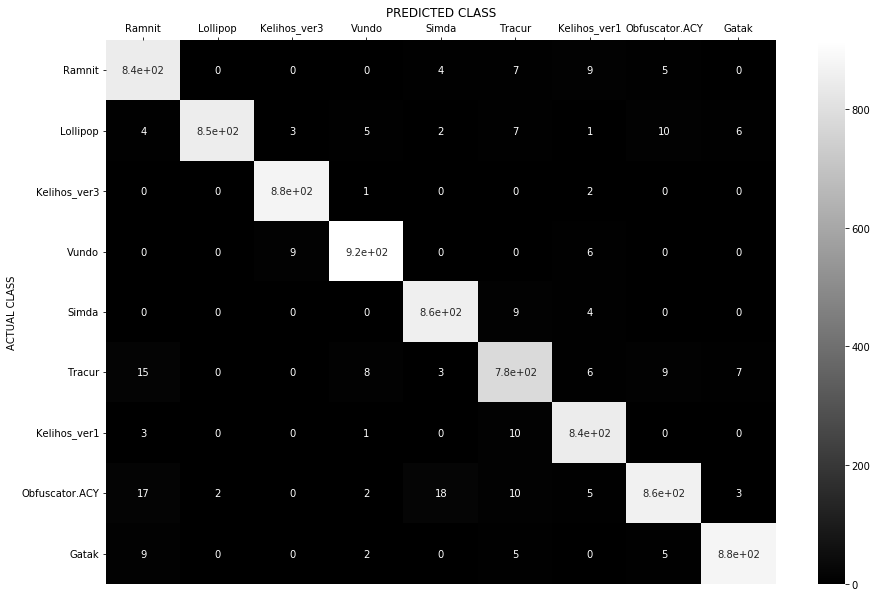

In [203]:
malwares = ["Ramnit","Lollipop", "Kelihos_ver3", "Vundo","Simda", "Tracur", "Kelihos_ver1","Obfuscator.ACY","Gatak"]
plt.figure(figsize=(15,10))
ax= sns.heatmap(confusion_matrix(np.asarray(y_conf),classes), annot=True,cmap="gray",
           xticklabels=malwares, yticklabels=malwares)
ax.set_title("PREDICTED CLASS")
plt.ylabel("ACTUAL CLASS")
ax.xaxis.tick_top()
plt.show()

# Random-Forest model

In [204]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [205]:
#for confusion 
model.fit(x_train,y_train)
ETC_train = model.predict(x_train)
ETC_y_pred_cv = model.predict(x_cv)
ETC_y_pred_test = model.predict(x_test)

In [206]:
y_pred_train = model.predict_proba(x_train)
y_pred_cv = model.predict_proba(x_cv)
y_pred_test = model.predict_proba(x_test)

In [207]:
lg_cv = log_loss(y_cv,y_pred_cv)
lg_test = log_loss(y_test,y_pred_test)

In [208]:
ERT_lg_CV = lg_cv

In [209]:
ERT_lg_test = lg_test

In [210]:
ERT_lg_CV,ETC_lg_test

(0.08500303873357824, 0.07253923960436397)

# LR

In [211]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred_train = model.predict_proba(x_train)
y_pred_cv = model.predict_proba(x_cv)
y_pred_test = model.predict_proba(x_test)

In [212]:
LR_train = model.predict(x_train)
LR_y_pred_cv = model.predict(x_cv)
LR_y_pred_test = model.predict(x_test)

In [213]:
lg_cv = log_loss(y_cv,y_pred_cv)
lg_test = log_loss(y_test,y_pred_test)

In [214]:
LR_lg_CV = lg_cv
LR_lg_test = lg_test

In [215]:
LR_lg_CV

0.9890773462371697

In [216]:
LR_lg_test

0.9655987653651273

# XGB

In [217]:
from xgboost import XGBClassifier
model = XGBClassifier(eval_metric="mlogloss")
model.fit(x_train,y_train)
y_pred_train = model.predict_proba(x_train)
y_pred_cv = model.predict_proba(x_cv)
y_pred_test = model.predict_proba(x_test)

In [218]:
XGB_train = model.predict(x_train)
XGB_y_pred_cv = model.predict(x_cv)
XGB_y_pred_test = model.predict(x_test)

In [219]:
lg_cv = log_loss(y_cv,y_pred_cv)
lg_test = log_loss(y_test,y_pred_test)

In [220]:
XGB_lg_CV = lg_cv
XGB_lg_test = lg_test

In [221]:
(XGB_lg_CV,XGB_lg_test)

(0.02893253606395405, 0.025429293468910937)

In [222]:
Resultsdf = pd.DataFrame({"Name":["Extra trees classifier","Logistic regression","XGBoost"],
                          "CV-logloss":[ERT_lg_CV,LR_lg_CV,XGB_lg_CV],
                          "Test-logloss":[ERT_lg_test,LR_lg_test,XGB_lg_test]})

In [223]:
Resultsdf

,Name,CV-logloss,Test-logloss
0,Extra trees classifier,0.085003,0.073951
1,Logistic regression,0.989077,0.965599
2,XGBoost,0.028933,0.025429


# Confusion metrics for Extra trees classifier

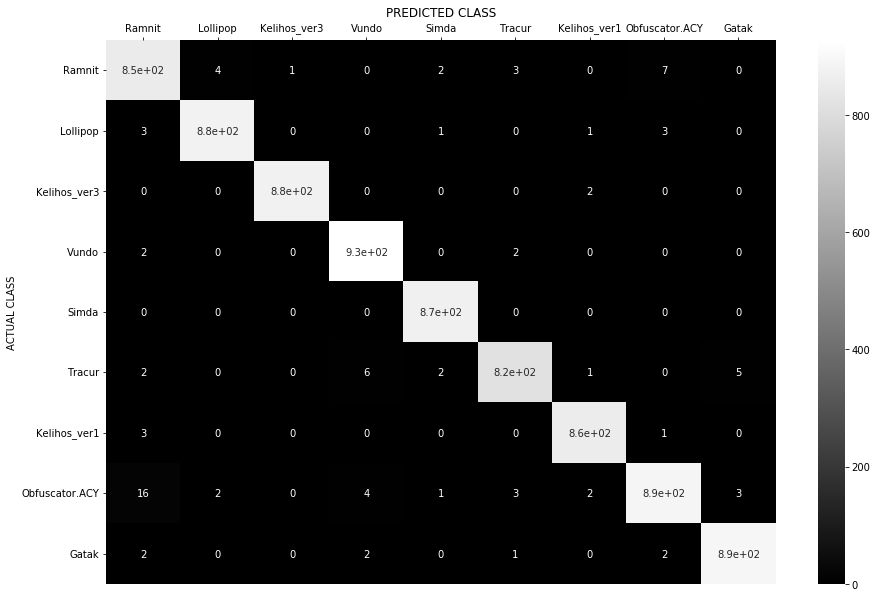

In [224]:
plt.figure(figsize=(15,10))
ax= sns.heatmap(confusion_matrix(y_test,ETC_y_pred_test), annot=True,cmap="gray",
           xticklabels=malwares, yticklabels=malwares)
ax.set_title("PREDICTED CLASS")
plt.ylabel("ACTUAL CLASS")
ax.xaxis.tick_top()
plt.show()

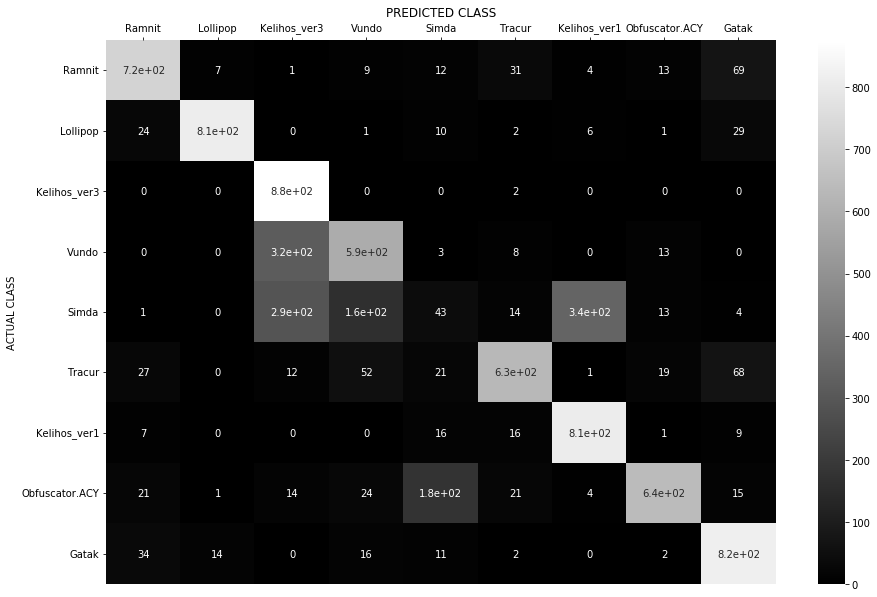

In [225]:
plt.figure(figsize=(15,10))
ax= sns.heatmap(confusion_matrix(y_test,LR_y_pred_test), annot=True,cmap="gray",
           xticklabels=malwares, yticklabels=malwares)
ax.set_title("PREDICTED CLASS")
plt.ylabel("ACTUAL CLASS")
ax.xaxis.tick_top()
plt.show()

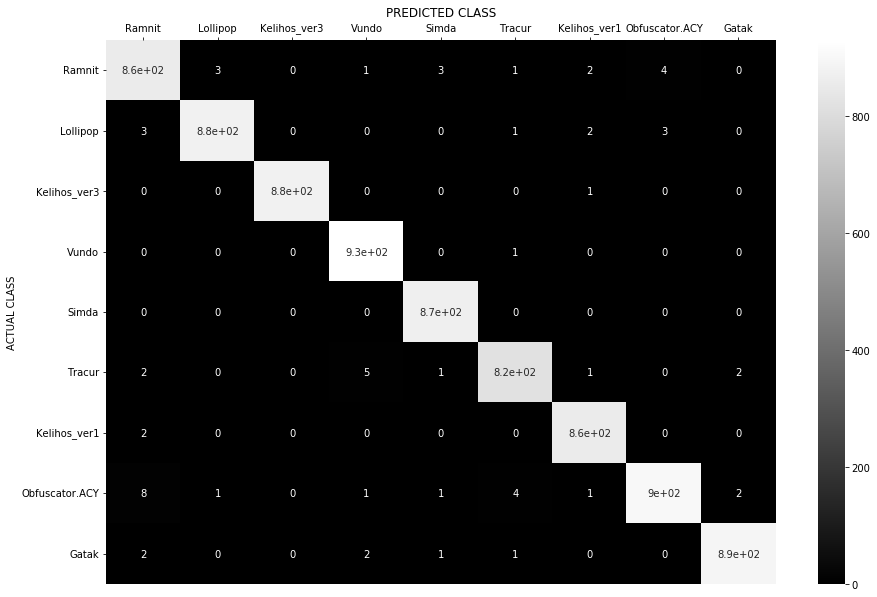

In [226]:
plt.figure(figsize=(15,10))
ax= sns.heatmap(confusion_matrix(y_test,XGB_y_pred_test), annot=True,cmap="gray",
           xticklabels=malwares, yticklabels=malwares)
ax.set_title("PREDICTED CLASS")
plt.ylabel("ACTUAL CLASS")
ax.xaxis.tick_top()
plt.show()

In [227]:
df.shape

(10868, 260)